## Séries Temporáis

https://www.youtube.com/watch?v=28dG0gyXz80

Bibliotecas para minerar dados financeiros:
Yfinance  
Pybovespa  
quandl  
Pandas Finance  
pandas data_reader  

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

In [24]:
# Puxando cotações

inter  = '1d' # Intervalo
inicio = '2019-01-01'
fim    = '2021-01-01'

tickets = {
    'ticket0' : yf.Ticker('GGBR4.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket1' : yf.Ticker('GGBR3.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket2' : yf.Ticker('VALE3.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket3' : yf.Ticker('USIM5.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket4' : yf.Ticker('CSNA3.SA').history(interval=inter, start=inicio, end=fim)
}



In [25]:
# Transformando em dataframes
DFGGBR4 = tickets['ticket0']
DFGGBR3 = tickets['ticket1']
DFVALE3 = tickets['ticket2']
DFUSIM5 = tickets['ticket3']
DFCSNA3 = tickets['ticket4']

# Criando uma lista com os daframes
DFS = [DFGGBR4, DFGGBR3, DFVALE3, DFUSIM5, DFCSNA3]

In [26]:
df = DFS[1]

In [27]:
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-02:00,9.628127,9.745068,9.339672,9.682699,47000,0.0,0
2019-01-03 00:00:00-02:00,9.589147,9.823029,9.402042,9.472206,63600,0.0,0
2019-01-04 00:00:00-02:00,9.480002,9.807436,9.480002,9.651515,43000,0.0,0


In [28]:
df[['Close']].info() # Selecionei só uma coluna, que é diferente disso aqui: df['Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2019-01-02 00:00:00-02:00 to 2020-12-30 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   496 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


## Decompondo nossa série

In [29]:
df[['Close']].head()

,Close
Date,
2019-01-02 00:00:00-02:00,9.682699
2019-01-03 00:00:00-02:00,9.472206
2019-01-04 00:00:00-02:00,9.651515
2019-01-07 00:00:00-02:00,9.721679
2019-01-08 00:00:00-02:00,9.674902


In [30]:
# Fazendo a decomposição aditiva da série
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

In [31]:
# Puxando a sazonalidade
decomposicao.seasonal

Date
2019-01-02 00:00:00-02:00   -0.028618
2019-01-03 00:00:00-02:00   -0.029700
2019-01-04 00:00:00-02:00   -0.054127
2019-01-07 00:00:00-02:00    0.015302
2019-01-08 00:00:00-02:00    0.004065
                               ...   
2020-12-22 00:00:00-03:00   -0.065277
2020-12-23 00:00:00-03:00   -0.126519
2020-12-28 00:00:00-03:00   -0.129260
2020-12-29 00:00:00-03:00   -0.096838
2020-12-30 00:00:00-03:00    0.014366
Name: seasonal, Length: 496, dtype: float64

<AxesSubplot:xlabel='Date'>

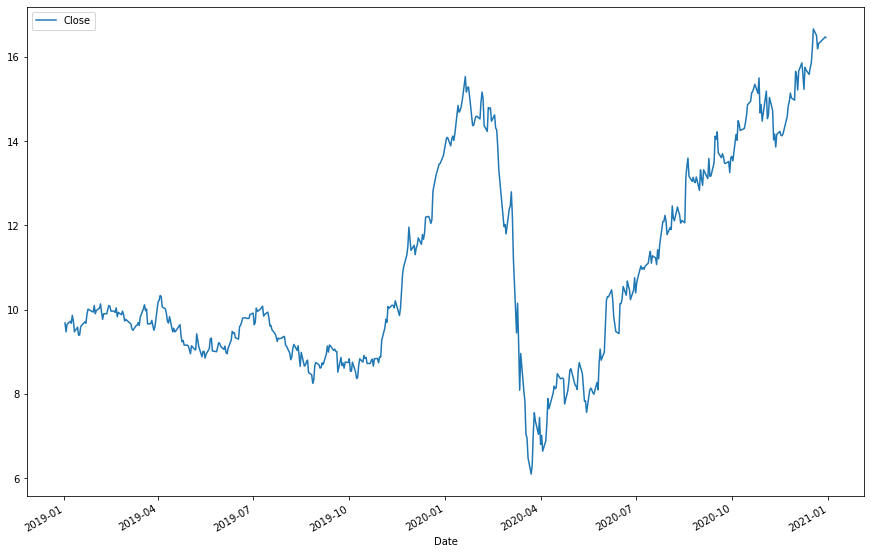

In [32]:
# Plotando um gráfico da séria não decomposta
df[['Close']].plot(figsize=(15,10))

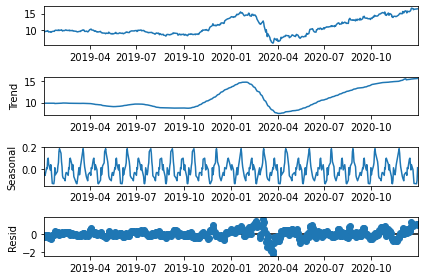

In [33]:
# Plotando gráficos da decomposição, se somar os 3 da a série.
decomposicao.plot();

In [34]:
# Decompondo a série (multiplicativa, mas pode ser aditiva tbm)
decomposicao_multi = seasonal_decompose(df[['Close']], model='multiplicative', period=30, extrapolate_trend=30)

In [35]:
# Puxando a sazonalidade da decomposiição multiplicativa
decomposicao_multi.seasonal

Date
2019-01-02 00:00:00-02:00    0.995966
2019-01-03 00:00:00-02:00    0.995789
2019-01-04 00:00:00-02:00    0.993510
2019-01-07 00:00:00-02:00    0.997994
2019-01-08 00:00:00-02:00    0.998566
                               ...   
2020-12-22 00:00:00-03:00    0.991473
2020-12-23 00:00:00-03:00    0.985371
2020-12-28 00:00:00-03:00    0.985709
2020-12-29 00:00:00-03:00    0.991693
2020-12-30 00:00:00-03:00    1.002243
Name: seasonal, Length: 496, dtype: float64

In [36]:
# Puxando sazonalidade da decomposição aditiva lá em cima.
decomposicao.seasonal

Date
2019-01-02 00:00:00-02:00   -0.028618
2019-01-03 00:00:00-02:00   -0.029700
2019-01-04 00:00:00-02:00   -0.054127
2019-01-07 00:00:00-02:00    0.015302
2019-01-08 00:00:00-02:00    0.004065
                               ...   
2020-12-22 00:00:00-03:00   -0.065277
2020-12-23 00:00:00-03:00   -0.126519
2020-12-28 00:00:00-03:00   -0.129260
2020-12-29 00:00:00-03:00   -0.096838
2020-12-30 00:00:00-03:00    0.014366
Name: seasonal, Length: 496, dtype: float64

In [37]:
# Puxando o maior valor residual
max(decomposicao_multi.resid)

1.1412070843009776

In [38]:
# Puxando o menor valor residual
min(decomposicao_multi.resid)

0.73817546145053

In [39]:
# Agora o maior valor residual da decomposição aditiva
max(decomposicao.resid)

1.5938879799424999

In [40]:
# Agora o menor valor residual da decomposição aditiva
min(decomposicao.resid)

-2.1935068169456122

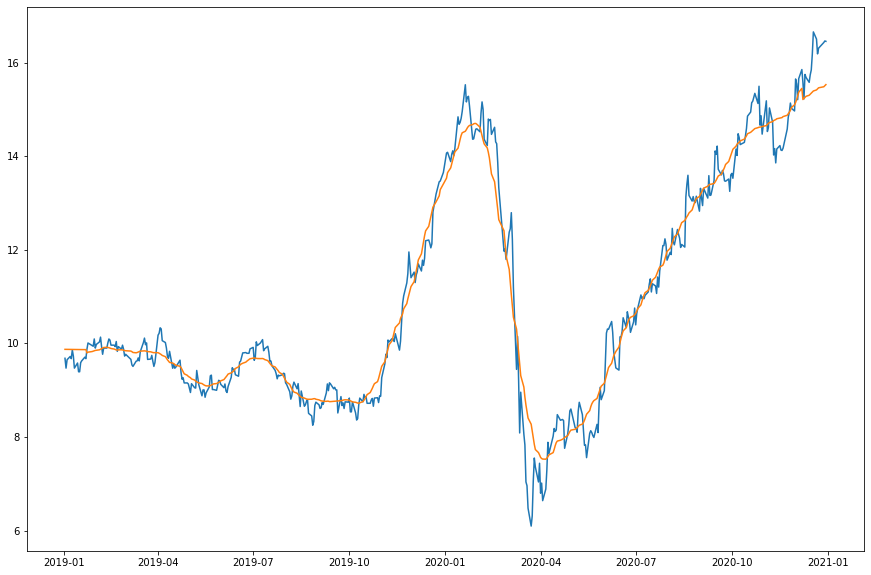

In [41]:
# Criando um gráfico melhor com a tendencia e a decomposição observada:
ax, fig = plt.subplots(figsize=(15,10))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

<AxesSubplot:xlabel='Date'>

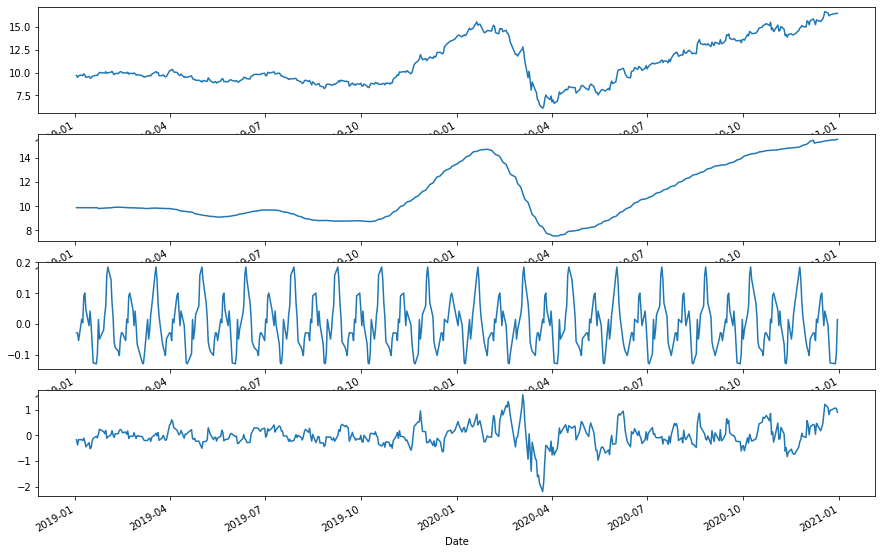

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)



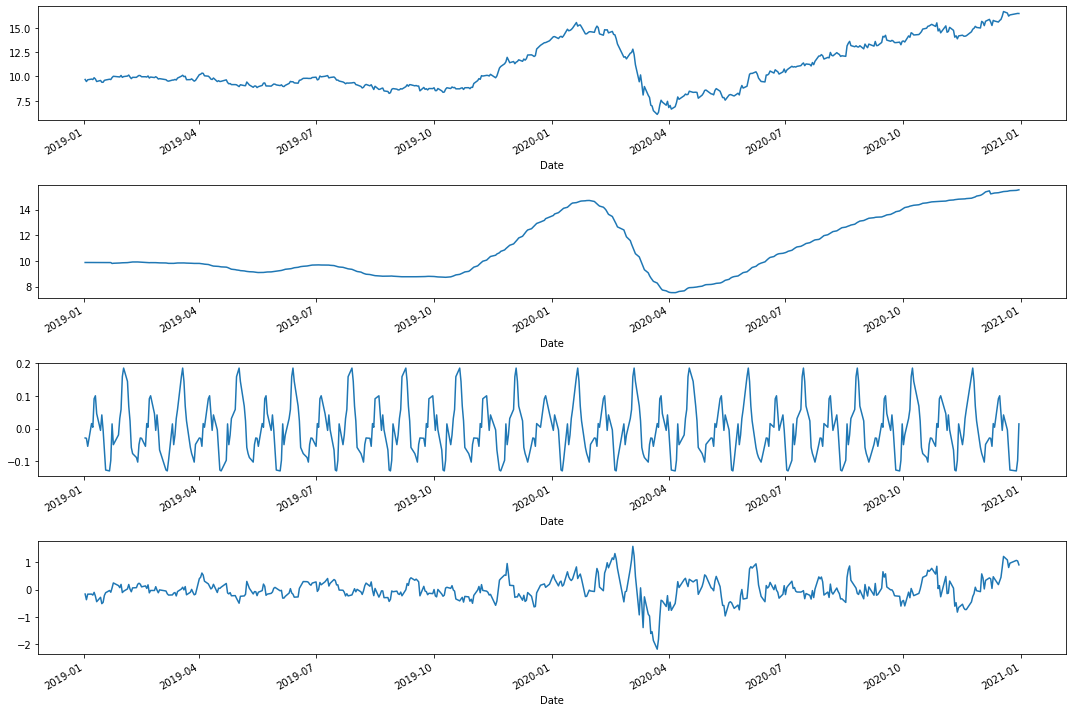

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,10))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()